In [134]:
%pip install -q transformers
%pip install datasets
%pip install transformers
%pip install numpy
%pip install matplotlib

from datasets import load_dataset
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
from matplotlib import pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [135]:
# load_imdb review dataset
imdb = load_dataset('imdb')

# load bert tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# tokenizer function to tokenizer txt data
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_imdb = imdb.map(preprocess_function, batched=True)

# only take first maxx samples
maxx = 100
seed = 32
np.random.seed(32)
x_test = np.array(tokenized_imdb['test']['text'])
y_test = np.array(tokenized_imdb['test']['label'])

test = np.column_stack((x_test, y_test))
np.random.shuffle(test)
x_test = test[:maxx, 0]
y_test = test[:maxx, 1]

Found cached dataset imdb (C:/Users/hashi/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)
100%|██████████| 3/3 [00:00<00:00, 20.56it/s]
Loading cached processed dataset at C:\Users\hashi\.cache\huggingface\datasets\imdb\plain_text\1.0.0\d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0\cache-ee4f81109053daaa.arrow
Loading cached processed dataset at C:\Users\hashi\.cache\huggingface\datasets\imdb\plain_text\1.0.0\d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0\cache-e0853b3bae41474a.arrow


In [136]:
# showing some statistics and general shape of dataset
print(f'x_test:\n{x_test[:3]}\nx_test_dim: {x_test.shape}\ny_test:\n{y_test}\ny_test_dim: {y_test.shape}')

x_test:
['"The Chipmunk Adventure" is one of the greatest animated movies of the 1980\'s. Alvin and the Chipmunks have always been of some interest to me, since they were what really got me into rock and roll. Neither one of the Chipmunks has any bad traits. Alvin\'s really the star and has all the cool looks. Theodore is the lovable sensitive one. Then there\'s Simon (my personal favorite), the smart one who is often a party pooper. I also like the Chipettes a lot. There\'s Brittany, who, like Alvin, is one who is always trying to be so popular. Then there\'s Eleanor, who, like Theodore, is sweet, sensitive, and loves food. Janette is the only Chipette who is not much like her counterpart; she\'s very naive and really clumsy.<br /><br />In the Chipmunks\' very first full-length movie, David Seville is going on a business trip to Europe, and he\'s leaving the boys with Miss Miller while he\'s gone. While playing an arcade game, Alvin loses against Brittany and then says that if he had 

In [137]:
# load distilbert-base-uncased pipeline
# load the tokenizer and model for sentiment analysis
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english', output_attentions=True)
bert = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# predict sentiment for x_test using bert model
yh = bert(x_test.tolist(), truncation=True)

In [138]:
# reformat yh to 0 1 instead of neg pos labels
yh = np.array([0 if row['label'] == 'NEGATIVE' else 1 for row in yh])

# change data type from str to int
yh = np.array(yh, dtype='int')
y_test = np.array(y_test, dtype='int')

# showing y_test, yh stacked beside each other to compare distilberts predictions on x_test yh and the true y_test labels
yyh = np.column_stack((y_test, yh))

# finding accuracy 
acc = y_test[y_test == yh].shape[0] / y_test.shape[0]
print(f'y, yh:\n{yyh}\naccuracy: {acc}')

y, yh:
[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]
accuracy: 0.9


text: Drawn by Pain is easily one of the best pieces of cinema I have ever seen. Here are my reviews of the episodes released so far: <br /><br />Episode one was even better than I expected and from everything I had heard about it, I expected quite a lot. I am very impressed with the actors already. The father was creepy and played perfectly. The little girl is so expressive, she uses her eyes to convey such emotion. The animation was superb. The cinematography was amazing, each camera angle capturing the feeling of the scene perfectly. The editing was done so well, each scene blending seamlessly into the next. The music captured the emotions quite well and drew you into the story. I just can't say enough about how wonderful this episode was. It definitely whets my appetite for more! <br /><br />Episode 2 was even better than the first one! Everything I said about the first episode carries through, only you get to see even more of the character development. I can not wait to finally se

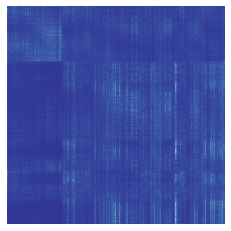

In [139]:
# find/save attention matrix given a text input
def get_attention_mat(text: str, save_path: str='', save: bool=False, verbose: bool=True, dpi: int=400, show_labels: bool=False):
    # if there is a path to save to set save to true otherwise it defaults to false
    if save_path: save = True

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs, output_attentions=True)
    attention_weights = outputs.attentions[0]

    # attention_weights has shape [1, 12, n+2, n+2]
    # representing 1 batch 12 attention heads each with a 320 x 320 attention matrix
    # arbirairly we choose the first attention head to look at 
    attention_mat = attention_weights[0, 0, :, :].detach().numpy()

    # Print the attention matrix
    if verbose: print(f'text: {text}\n\nattention_matrix_h1:\n{attention_mat}\nshape: {attention_mat.shape}\nmean: {np.mean(attention_mat)}\nmin: {np.min(attention_mat)}\nmax: {np.max(attention_mat)}')

    # displaying the attention matrix as a heatmap
    fig, ax = plt.subplots()
    if show_labels:

        # adding labels of words on the x y axes
        words = text.split(' ')
        ax.set_xticks(np.arange(len(words)))
        ax.set_yticks(np.arange(len(words)))
        ax.set_xticklabels(words)
        ax.set_yticklabels(words)

        # changing colors of plt / labels
        fig.set_facecolor('#04001c')
        ax.tick_params(axis='x', colors='#e1dbff')
        ax.tick_params(axis='y', colors='#e1dbff')
        ax.xaxis.set_ticks_position('top')

        im = ax.imshow(attention_mat, cmap=plt.cm.RdYlBu_r)
        if save: fig.savefig(save_path, dpi=dpi)
        return
        
    ax.axis('off')
    im = ax.imshow(attention_mat, cmap=plt.cm.RdYlBu_r)
    if save: fig.savefig(save_path, dpi=dpi)

# using row 14 y_test = 0 yh = 0 so correct negative prediction as example
get_attention_mat(text=test[14, 0], save_path='./data/test_14_attention.png')

text: this movie sucks its just truly awful

attention_matrix_h1:
[[0.12550715 0.06428273 0.0746639  0.07645402 0.08439182 0.04952218
  0.05012904 0.09471331 0.38033575]
 [0.24358886 0.07347637 0.06972373 0.06238478 0.06556362 0.17535272
  0.13936049 0.09675179 0.0737976 ]
 [0.12239426 0.07434376 0.07304145 0.12295625 0.06254205 0.10302418
  0.16165674 0.08441337 0.19562784]
 [0.3008338  0.04652459 0.08615857 0.06647435 0.02570459 0.05086584
  0.14185277 0.12441303 0.15717246]
 [0.3733418  0.13185479 0.07643009 0.05415488 0.04217069 0.06294066
  0.10592269 0.0982477  0.05493667]
 [0.34863165 0.14020135 0.03776708 0.03345098 0.07259664 0.05144304
  0.06695981 0.0983356  0.15061389]
 [0.18563998 0.10037399 0.07020515 0.12949027 0.05951024 0.14343677
  0.07733941 0.11762384 0.11638035]
 [0.22915597 0.06388777 0.10287958 0.10654883 0.07014496 0.07981038
  0.09684695 0.10596292 0.14476271]
 [0.36721078 0.07891759 0.0321887  0.03681465 0.06163315 0.06555436
  0.06900439 0.0569059  0.2317704 

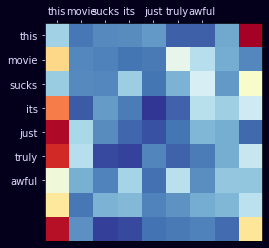

In [140]:
# trying with a smaller example text
neg_sample = 'this movie sucks its just truly awful'
get_attention_mat(neg_sample, save_path='./data/neg_sample_attention.png', show_labels=True)
